<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(0__3)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0-3'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n30-3.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,79.965965,90.899328,60.327680,0.917250,242.110222,241.109745,1.000477
1,0.0,1.0,72.467779,80.518192,55.532273,0.167039,218.685284,218.420567,0.264717
2,0.0,2.0,21.530958,42.645747,47.102950,-0.462135,120.817520,121.060361,-0.242841
3,0.0,3.0,94.824112,30.640201,72.097011,0.357989,207.919313,207.622460,0.296853
4,0.0,4.0,41.674271,60.768591,67.078490,0.494809,180.016161,179.361198,0.654963
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,96.623324,91.840836,85.660270,-0.508666,283.615764,283.676581,-0.060817
29996,999.0,26.0,46.511118,21.304970,62.553099,1.170357,141.539544,140.775035,0.764508
29997,999.0,27.0,67.361840,55.377336,40.427510,-0.100806,173.065880,173.386251,-0.320371
29998,999.0,28.0,32.930456,66.612158,72.385564,1.081892,183.010069,182.670514,0.339555


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    79.965965  90.899328  60.327680  ...  242.110222  241.109745  1.000477
      1.0    72.467779  80.518192  55.532273  ...  218.685284  218.420567  0.264717
      2.0    21.530958  42.645747  47.102950  ...  120.817520  121.060361 -0.242841
      3.0    94.824112  30.640201  72.097011  ...  207.919313  207.622460  0.296853
      4.0    41.674271  60.768591  67.078490  ...  180.016161  179.361198  0.654963
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   96.623324  91.840836  85.660270  ...  283.615764  283.676581 -0.060817
      26.0   46.511118  21.304970  62.553099  ...  141.539544  140.775035  0.764508
      27.0   67.361840  55.377336  40.427510  ...  173.065880  173.386251 -0.320371
      28.0   32.930456  66.612158  72.385564  ...  183.010069  182.670514  0.339555
      29.0   67.109779  40.292901  35.849008  ...  154.795973  153.455340  1.340633

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    79.965965  90.899328  60.327680  ...  242.110222  241.109745  1.000477
      1.0    72.467779  80.518192  55.532273  ...  218.685284  218.420567  0.264717
      2.0    21.530958  42.645747  47.102950  ...  120.817520  121.060361 -0.242841
      3.0    94.824112  30.640201  72.097011  ...  207.919313  207.622460  0.296853
      4.0    41.674271  60.768591  67.078490  ...  180.016161  179.361198  0.654963
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   96.623324  91.840836  85.660270  ...  283.615764  283.676581 -0.060817
      26.0   46.511118  21.304970  62.553099  ...  141.539544  140.775035  0.764508
      27.0   67.361840  55.377336  40.427510  ...  173.065880  173.386251 -0.320371
      28.0   32.930456  66.612158  72.385564  ...  183.010069  182.670514  0.339555
      29.0   67.109779  40.292901  35.849008  ...  154.795973  153.455340  1.340633

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,79.965965,90.899328,60.327680,0.917250,242.110222,241.109745,1.000477
1,0.0,1.0,72.467779,80.518192,55.532273,0.167039,218.685284,218.420567,0.264717
2,0.0,2.0,21.530958,42.645747,47.102950,-0.462135,120.817520,121.060361,-0.242841
3,0.0,3.0,94.824112,30.640201,72.097011,0.357989,207.919313,207.622460,0.296853
4,0.0,4.0,41.674271,60.768591,67.078490,0.494809,180.016161,179.361198,0.654963
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,96.623324,91.840836,85.660270,-0.508666,283.615764,283.676581,-0.060817
29996,999.0,26.0,46.511118,21.304970,62.553099,1.170357,141.539544,140.775035,0.764508
29997,999.0,27.0,67.361840,55.377336,40.427510,-0.100806,173.065880,173.386251,-0.320371
29998,999.0,28.0,32.930456,66.612158,72.385564,1.081892,183.010069,182.670514,0.339555


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    79.965965  90.899328  60.327680  ...  242.110222  241.109745  1.000477
      1.0    72.467779  80.518192  55.532273  ...  218.685284  218.420567  0.264717
      2.0    21.530958  42.645747  47.102950  ...  120.817520  121.060361 -0.242841
      3.0    94.824112  30.640201  72.097011  ...  207.919313  207.622460  0.296853
      4.0    41.674271  60.768591  67.078490  ...  180.016161  179.361198  0.654963
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   96.623324  91.840836  85.660270  ...  283.615764  283.676581 -0.060817
      26.0   46.511118  21.304970  62.553099  ...  141.539544  140.775035  0.764508
      27.0   67.361840  55.377336  40.427510  ...  173.065880  173.386251 -0.320371
      28.0   32.930456  66.612158  72.385564  ...  183.010069  182.670514  0.339555
      29.0   67.109779  40.292901  35.849008  ...  154.795973  153.455340  1.340633

[30000 rows x 7 columns]

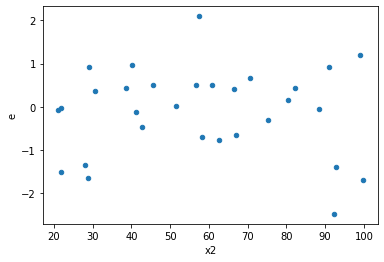

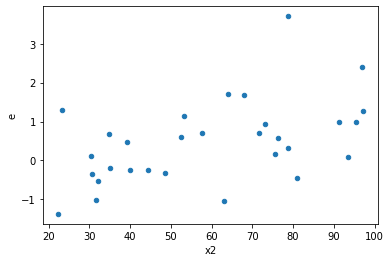

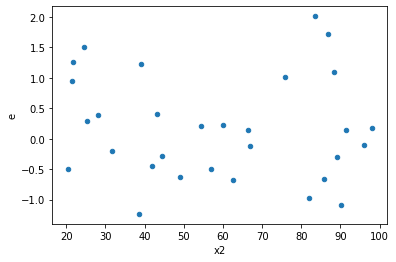

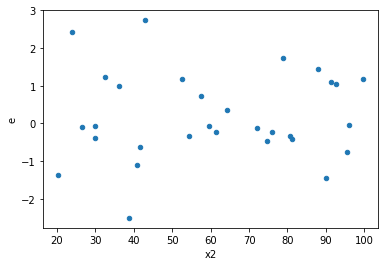

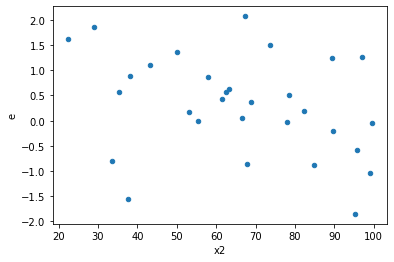

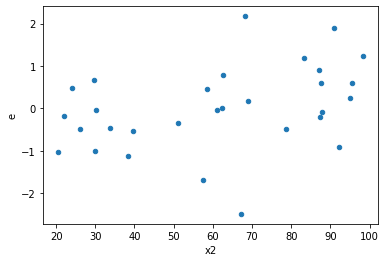

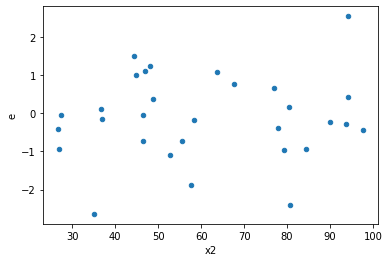

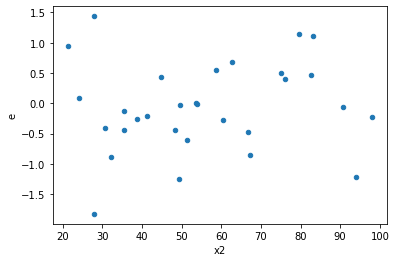

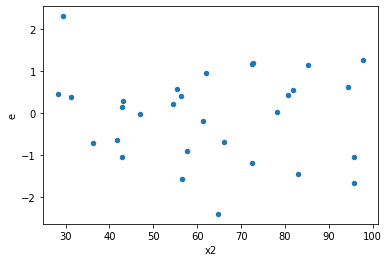

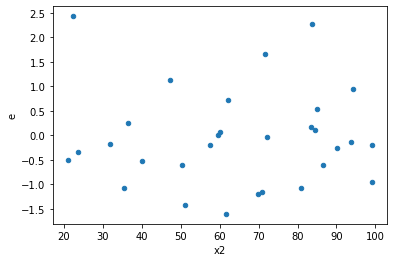

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,10.0,14.0,5.265280109800267,17.712196518182324,0.5265280109800268,1.2651568941558804,2.402829228023488,0.13063104677595994,0.93468447661202,0.06531552338797997,Reject001=1 : Homoscedasticity
2.0,15.0,9.0,7.047351191402826,10.450844955896144,0.4698234127601884,1.1612049950995715,2.4715775407563276,0.17309231017125803,0.913453844914371,0.08654615508562902,Reject001=1 : Homoscedasticity
3.0,13.0,11.0,11.62939445590041,12.254672457795147,0.8945688043000316,1.1140611325268315,1.2453610355869102,0.7239641104208039,0.6380179447895981,0.36198205521040194,Reject001=1 : Homoscedasticity
4.0,17.0,7.0,11.568212568111239,6.617429490146355,0.6804830922418376,0.9453470700209079,1.3892293295730265,0.685659331153603,0.6571703344231985,0.3428296655768015,Reject001=1 : Homoscedasticity
5.0,8.0,16.0,3.225644989727378,19.599020214479285,0.4032056237159222,1.2249387634049553,3.0380001948285913,0.05579687196985317,0.9721015640150734,0.027898435984926584,Reject001=1 : Homoscedasticity
6.0,13.0,11.0,14.764366239242824,16.138612697403794,1.1357204799417557,1.4671466088548903,1.2918201571306802,0.6785316141616293,0.6607341929191853,0.33926580708081466,Reject001=1 : Homoscedasticity
9.0,16.0,8.0,13.522117078850064,14.657728375971095,0.845132317428129,1.8322160469963868,2.1679635356651716,0.2687702085846717,0.8656148957076641,0.13438510429233586,Reject001=1 : Homoscedasticity
10.0,11.0,13.0,6.475284400371816,14.538249305779633,0.5886622182156196,1.1183268696753563,1.899776875548903,0.27064900058866037,0.8646754997056698,0.13532450029433019,Reject001=1 : Homoscedasticity
11.0,14.0,10.0,13.977521840687041,14.266564955023428,0.9983944171919316,1.4266564955023429,1.428950794331297,0.5776991283727244,0.7111504358136378,0.2888495641863622,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,12.0,12.0,16.4133451851923,7.769806553435899,1.3677787654326916,0.6474838794529916,0.47338348555817983,0.20961959735266408,Reject001=1 : Homoscedasticity
1.0,10.0,14.0,5.265280109800267,17.712196518182324,0.5265280109800268,1.2651568941558804,2.402829228023488,0.13063104677595994,Reject001=1 : Homoscedasticity
2.0,15.0,9.0,7.047351191402826,10.450844955896144,0.4698234127601884,1.1612049950995715,2.4715775407563276,0.17309231017125803,Reject001=1 : Homoscedasticity
3.0,13.0,11.0,11.62939445590041,12.254672457795147,0.8945688043000316,1.1140611325268315,1.2453610355869102,0.7239641104208039,Reject001=1 : Homoscedasticity
4.0,17.0,7.0,11.568212568111239,6.617429490146355,0.6804830922418376,0.9453470700209079,1.3892293295730265,0.685659331153603,Reject001=1 : Homoscedasticity
5.0,8.0,16.0,3.225644989727378,19.599020214479285,0.4032056237159222,1.2249387634049553,3.0380001948285913,0.05579687196985317,Reject001=1 : Homoscedasticity
6.0,13.0,11.0,14.764366239242824,16.138612697403794,1.1357204799417557,1.4671466088548903,1.2918201571306802,0.6785316141616293,Reject001=1 : Homoscedasticity
7.0,8.0,16.0,7.135586747802357,7.350062305511729,0.8919483434752946,0.45937889409448307,0.5150285859656479,0.34376418441644596,Reject001=1 : Homoscedasticity
8.0,10.0,14.0,14.993098102409721,10.799439684998069,1.499309810240972,0.7713885489284334,0.5144957657580153,0.2938950346414918,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      979
Reject001=0 : Heteroscedasticity     21
Name: Result_test, dtype: int64